# Data Analysis

## Importing the Cleaned Data Frames

In [160]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
%matplotlib inline
import plotly.graph_objects as go

In [121]:
# Since we're using the same kernel as the other notebook, we're able to use the same dataframe names
# Inflation rate per year
inflation_df.head()

,Annual
Year,
1980,12.4
1981,10.4
1982,7.4
1983,4.0
1984,5.0


In [122]:
# Mortgage rate per year
mort_avg_df.head()

,MORTGAGE30US
Year,
1971,7.541750
1972,7.383269
1973,8.044808
1974,9.187115
1975,9.047115


In [123]:
# Median Household Income per year
median_income_df

,MEHOINUSA646N
Year,
1984,22420
1985,23620
1986,24900
1987,26060
1988,27230
1989,28910
1990,29940
1991,30130
1992,30640


In [124]:
# Median House Price per year
median_house_df

,MSPUS
Year,
1963,17800.0
1963,18000.0
1963,17900.0
1963,18500.0
1964,18500.0
...,...
2022,468000.0
2022,479500.0
2023,429000.0


In [125]:
# U.S. National Debt per year
us_debt_df.head()

,Debt Outstanding Amount
Year,
2023,3.316733e+13
2022,3.092891e+13
2021,2.842892e+13
2020,2.694539e+13
2019,2.271940e+13


In [126]:
# Price for a Pound of Chicken per year
chicken_df.head()

,Average Chicken Price per Pound
Year,
1980,0.709
1981,0.732
1982,0.714
1983,0.725
1984,0.810


In [127]:
# Price for a Pound of Coffee per year
coffe_df.head()

,Average Coffee Price
Year,
1980,3.142
1981,2.527
1982,2.524
1983,2.466
1984,2.578


In [128]:
# Price of Electricity per PWH per year
electricity_df.head()

,Average Electricity Price
Year,
1980,0.060
1981,0.069
1982,0.076
1983,0.078
1984,0.082


In [129]:
# Price of Gasoline per gallon per year
gasoline_df.head()

,Average Gasoline Price
Year,
1980,1.221
1981,1.353
1982,1.281
1983,1.225
1984,1.198


In [130]:
# Price for a Pound of White Bread per year
bread_df.head()

,Average Bread Price
Year,
1980,0.509
1981,0.525
1982,0.532
1983,0.542
1984,0.541


## Creating  Plot Objects

In [131]:
# Plot data using hvplot.bar
bread_df.hvplot.line()

:Curve   [Year]   (Average Bread Price)

#### US Median Household Income vs US Median House Price 

In [132]:
median_income_df.hvplot(label="Median Household Income") * median_house_df.hvplot(label="Median House Price", rot=30).opts(yformatter='%.0f')

:Overlay
   .Curve.Median_Household_Income :Curve   [Year]   (MEHOINUSA646N)
   .Curve.Median_House_Price      :Curve   [Year]   (MSPUS)

In [133]:
median_house_df.hvplot(rot=30).opts(yformatter='%.0f')

:Curve   [Year]   (MSPUS)

### Commodity Price Trend

In [134]:
# Visualizing the price trend for basic goods
chicken_df.hvplot(label="Chicken Price per lb") * coffe_df.hvplot(label="Coffee Price per lb") * electricity_df.hvplot(label="Electricity Price per KWH") * gasoline_df.hvplot(label="Gasoline Price per Gallon") * bread_df.hvplot(label="White Bread Price per lb")

:Overlay
   .Curve.Chicken_Price_per_lb      :Curve   [Year]   (Average Chicken Price per Pound)
   .Curve.Coffee_Price_per_lb       :Curve   [Year]   (Average Coffee Price)
   .Curve.Electricity_Price_per_KWH :Curve   [Year]   (Average Electricity Price)
   .Curve.Gasoline_Price_per_Gallon :Curve   [Year]   (Average Gasoline Price)
   .Curve.White_Bread_Price_per_lb  :Curve   [Year]   (Average Bread Price)

In [141]:
chicken_plot = chicken_df.hvplot.line(label="Chicken Price per lb")
coffee_plot = coffe_df.hvplot.line(label="Coffee Price per lb")
electricity_plot = electricity_df.hvplot.line(label="Electricity Price per KWH")
gasoline_plot = gasoline_df.hvplot.line(label="Gasoline Price per Gallon")
bread_plot = bread_df.hvplot.line(label="White Bread Price per lb")

# Combine plots with overlay
overlay_plot = (chicken_plot * coffee_plot * electricity_plot * gasoline_plot * bread_plot)

# Set legend position for the overlay
overlay_plot = overlay_plot.opts(legend_position='right')

# Show the plot
overlay_plot

:Overlay
   .Curve.Chicken_Price_per_lb      :Curve   [Year]   (Average Chicken Price per Pound)
   .Curve.Coffee_Price_per_lb       :Curve   [Year]   (Average Coffee Price)
   .Curve.Electricity_Price_per_KWH :Curve   [Year]   (Average Electricity Price)
   .Curve.Gasoline_Price_per_Gallon :Curve   [Year]   (Average Gasoline Price)
   .Curve.White_Bread_Price_per_lb  :Curve   [Year]   (Average Bread Price)

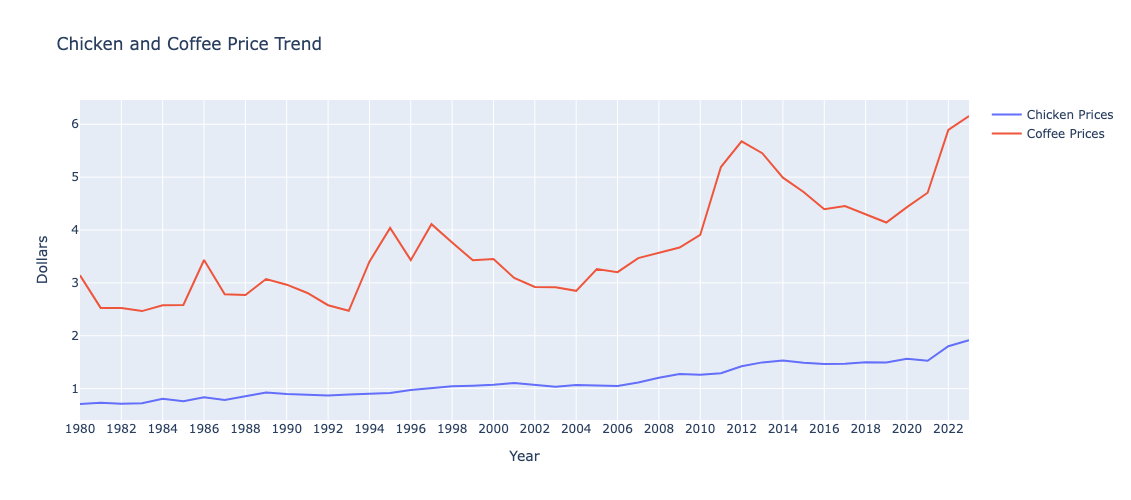

In [190]:
# Using Plotly new library
# Assuming you have a DataFrame named 'chicken_df'
# chicken_plot = px.line(chicken_df)
# coffee_plot = px.line(coffe_df)
# coffee_plot.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=chicken_df.index, y=chicken_df['Average Chicken Price per Pound'], mode='lines', name='Chicken Prices'))
# Add traces for coffee prices
fig.add_trace(go.Scatter(x=coffe_df.index, y=coffe_df['Average Coffee Price'], mode='lines', name='Coffee Prices'))

fig.update_layout(width=1100, height = 500, title='Chicken and Coffee Price Trend', xaxis_title='Year', yaxis_title='Dollars')
fig.update_xaxes(dtick=2, tickmode='linear')

fig.show()